# Reconocimiento de patrones: Clasificación
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Clasificación%20III.ipynb)

## Técnicas de clasificación: Árboles de decisión

Los [árboles de decisión](https://en.wikipedia.org/wiki/Decision_tree) son uno de los métodos de clasificación más antiguos y robustos y, por lo tanto, de las más utilizados. Nuevamente, se trata de un método fácil de entender y cuyo mecanismo de razonamiento es transparente: Un árbol de decisión utiliza un grafo en forma de [árbol](https://en.wikipedia.org/wiki/Tree_(graph_theory)) que representa una serie de reglas de decisión.

![](images/grammar.png)<br>

Supongamos por ejemplo, que finalmente han entrado en vigor los infames [Acuerdos de Sokovia](http://thelegalgeeks.com/2016/05/10/why-the-sokovia-accords-are-unconstitutional/) o algunos de los [registros](https://en.wikipedia.org/wiki/Registration_acts_%28comics%29) similares que han venido amenazando la integridad y libre acción de los superhéroes. En tales casos, es desaeble poder clasificar rápidamente a los *super* en diferentes grupos de riesgo, sobre la base de un conjunto de características:

![](images/heroes.png)<br>

Para implementar el registro de superhéroes, hemos creado un sistema para clasificar un primer grupo de  superhéroes de acuerdo a las caracteristicas mostradas en la tabla a continuación y a partir de ahí creamos el árbol de decisión a su derecha. 

![](images/superheroes.png)

Analicemos la clasificación realizada:

1. Hemos conformado dos grupos: el primer grupo, **A**, incluye a los superhéroes *Batman, Blade, Catwoman, Hellboy, Hulk, Wolverine, Jean Grey, Raphael* y *Thor*, mientras que en el grupo **B** se encuentran *Ant Man, Black Panther, Black Widow, Green Arrow, Green Lantern, Ironman, Spiderman, Star-Lord, Superman, The Flash* y *War Machine*. Estos datos constituyen nuestros datos de aprendizaje.<br><br>
2. En la tabla podemos observar que **TODOS** los superhéroes cuya capacidad/disposición a trabajar en equipo (*Team player*) es falsa (no = 0) se encuentran en el grupo **A**. Esto genera una primera regla (que corresponde al nodo raíz del árbol): I) <u style="color: blue">*Si Team player <= 0.5*, entonces esos *supers* pertenecen a la clase **A**</u>. Esto se representa como un *nodo hoja* en el que se establece que contiene 6 elementos (los 6 *super* no colaborativos), los 6 en la primera clase (0 elementos en la segunda clase) y el grupo completo puede etiquetarse como perteneciente a la clase **A**.<br><br>
3. Los 14 restantes se mantienen en un grupo mezclado (3 miembros de la clase **A** y 11 miembros d ela clase **B**), representado mediante un *nodo interno*. Globalmente podemos clasificar el grupo completo como perteneciente a la clase **B**, de la que hay mas representantes. Sin embargo, podemos observar, de entre estos *supers* por clasificar, que 8 de los que pertenecen a la clase B no tienen superpoderes (sus habilidades las obtuvieron por entrenamiento -3- o gracias a *gadgets* -2-). Entonces utilizamos una segunda regla de clasificación para separar en términos del origen de sus "poderes". Con esto, ahora tenemos otro grupo bien definido: II) <u style="color: blue">Si el superhéroe es colaborativo Y no tiene superpoderes, entonces pertenece a la clase **B**</u>. Representamos este grupo en otro nodo hoja.<br><br>
4. Ahora nos quedan 6 elementos por clasificar, 3 superhéroes clase **A** y 3 superhéroes clase **B**. Observamos que: los 3 superhéroes clase **A** carecen de doble identidad y los 3 *supers* de la clase **B** aún sin clasificar coinciden en que si tienen identidad alterna. Entonces: tenemos las últimas reglas: III) <u style="color: blue">Los superhéroes colaborativos con superpoderes (reales) y **SIN** identidad secreta también pertenecen a la clase **A**</u> y IV) <u style="color: blue">los superhéroes colaborativos con superpoderes (reales) y **CON** identidad secreta también pertenecen a la clase **B**</u>.

Observemos que los atributos **Human**, **Main power** y **Sex** no se requieren para realizar la clasificación, de manera que, en principio podemos desechar estos atributos (salvo que nuevas observaciones los requieran).


<hr style="border-width: 2px;">

Los árboles de decisión son un método no paramétrico de aprendizaje supervisado utilizado para clasificación y regresión. El objetivo es generar un conjunto de reglas de decisión simples a partir de las características de los datos de entrenamiento.

En un árbol de decisión, los datos de entrenamiento son divididos en cada nodo utilizando reglas de decisión para obtener grupos de elementos similares. Este agrupamiento equivale a una operación de decisión tipo *switch*(caso). <br><br>

![](images/animals01.png)<br>

Una elección más común, consiste en utilizar árboles binarios, lo que corresponde a utilizar operaciones *if* anidadas.

![](images/animals02.png)

<br>

Cada nodo interno en el árbol representa una evaluación sobre un atributo, los arcos representan los posibles resultados de la evaluación y las hojas representan una decisión (una asignación de elementos a una clase). Las trayectorias, desde el nodo raíz a las hojas son las reglas de decisión.

### Medidas de dispersión para escisión de nodos

Los algoritmos para dividir las muestras de cada nodo, se basan en medir la homogeneidad que tendrían los nodos resultantes. Las principales medidas de dispersión para la construcción de árboles de decisión son:

* [El índíce de Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), y
* [La ganancia de información / Entropía](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees).

Aunque pueden utilizarse otras medidas de dispersión. Entre las medidas que suelen utilizarse para la construcción de árboles se encuentran las siguientes:

* [La reducción en varianza](https://en.wikipedia.org/wiki/Variance_reduction).
* [La Chi-cuadrada](https://en.wikipedia.org/wiki/Chi-squared_distribution).



#### El índice de impureza de Gini

El **índice de Gini** mide la impureza de una población: Decimos que un conjunto de datos es puro (u homogéneo) si contiene únicamente elementos de una sóla clase. La idea principal del índice de Gini es calcular la probabilidad de escoger un elemento al azar que haya sido mal clasificado. 

Dado un conjunto de elementos pertenecientes a $J$ clases, si $f_i$ es el número de elementos clasificados como pertenecientes a la clase $i\in \{1,2,...,J\}$, entonces, definimos el índice de Gini como:

$$
I_G(f) = \sum_{i=1}^J f_i (1-f_i) = \sum_{i=1}^J(f_i - f_i^2) = \sum_{i=1}^J f_i - \sum_{i=1}^J f_i^2 = 1 - \sum_{i=1}^J f_i^2 
$$

El índice de Gini obtiene su valor mínimo (cero) cuando todos los elementos en el grupo pertenecen a la misma clase. 

La construcción de un árbol de decisiones binario se construye seleccionando un atributo a la vez que divida la colección de elementos en dos grupos. El criterio de selección es aquel atributo que minimiza el índice de Gini. Observemos el árbol de decisiones que arroja la clase *sklearn.tree* para el caso de superhéroes:

![](images/heroes2.png)<br>

* El índice de Gini para el grupo completo, 9 de ellos pertencientes a la clase $A$ y 11 pertenecientes a la clase $B$ es:<br>
$I_G = 1-\left(\left(\frac{9}{20}\right)^2+\left(\frac{11}{20}\right)^2\right) = 0.495$<br><br>

* Para dividir este primer grupo debemos evaluar la calidd de todas las divisiones obtenidas mediante los diferentes atributos y elegimos aquella regla que minimiza el ínidce de Gini.<br><br>
Por ejemplo, si separamos los datos de acuerdo al atributo **Sex** tendríamos los siguientes índices de Gini para cada uno de los grupos:<br>
*Woman*: $I_G = 1-\left(\left(\frac{2}{3}\right)^2+\left(\frac{1}{3}\right)^2\right) = 0.44$<br>
*Man*: $I_G = 1-\left(\left(\frac{10}{17}\right)^2+\left(\frac{7}{17}\right)^2\right) = 0.48$<br>
*División:* $I_G = \left(\frac{3}{20}\right)\times 0.44 + \left(\frac{17}{20}\right)\times0.48 = 0.478$<br><br>
En el caso de **Human** tendríamos:<br>
*Yes*: $I_G = 1-\left(\left(\frac{6}{16}\right)^2+\left(\frac{10}{16}\right)^2\right) = 0.47$<br>
*No*: $I_G = 1-\left(\left(\frac{3}{4}\right)^2+\left(\frac{1}{4}\right)^2\right) = 0.375$<br>
*División:* $I_G = \left(\frac{4}{20}\right)\times 0.375 + \left(\frac{16}{20}\right)\times0.47 = 0.45$<br><br>
El índice para **Team player** es:<br>
*Yes*: $I_G = 1-\left(\left(\frac{3}{14}\right)^2+\left(\frac{11}{14}\right)^2\right) = 0.337$<br>
*No*: $I_G = 1-\left(\left(\frac{6}{6}\right)^2+\left(\frac{0}{6}\right)^2\right) = 0$<br>
*División:* $I_G = 0.337 $<br><br>
El cálculo para **Alter ego** arroja:<br>
*Yes*: $I_G = 1-\left(\left(\frac{2}{8}\right)^2+\left(\frac{6}{8}\right)^2\right) = 0.375$<br>
*No*: $I_G = 1-\left(\left(\frac{5}{12}\right)^2+\left(\frac{7}{12}\right)^2\right) = 0.486$<br>
*División:* $I_G = \left(\frac{12}{20}\right)\times 0.375 + \left(\frac{8}{20}\right)\times 0.486= 0.442$<br><br>
En todos estos casos el atributo es binario, entonces el punto de decisión se toma entre 0 y 1, de manera que la regla se expresa como *if x $\le$ 0.5 then...* Para el atributo **Power Origin** hay 3 posibles 'puntos' de división: 0.5, 1.5 y 2.5. Es necesario evaluar cada uno de los 4 casos para determinar si este es un buen atributo de división. Ocurre algo similar para **Main Power** con 4 posibles puntos de división.<br><br>
Después de evaluar todas las opciones, el algoritmo ha seleccionado el atributo **Team player** como mejor opción para dividir el grupo inicial. 

* El proceso continúa hasta que cada grupo sea puro o hasta alcanzar un tamaño de grupo mínimo predefinido.

#### El índice de ganancia de información / Entropía.

La entropía es una medida del "desorden" de un sistema. Por desorden se entiende el número de posibles estados en los que puede estar un sistema dada una composición específica. Este concepto se suele utilizar como metáfora en diversos campos. 

Aplicado a los sistemas de información, la entropía mide la cantidad de incertidumbre en un conjunto de datos. La cantidad de información en un conjunto de datos puede definirse en términos de la entropía, o más específicamente de la llamada [**Entropía de Shannon**](https://en.wikipedia.org/wiki/Entropy_%28information_theory%29), como (*1-Entropía*).


La **entropía de Shannon** $\mathrm {H}$ de una variable aleatoria discreta $X$ con posibles valores $\{x_1, \ldots, x_n\}$ y función de probabilidad $P(X)$ está dada por:

$$
\mathrm {H} (X) = -\sum _{i=1}^n \mathrm{P} (x_i)\log_b \mathrm {P} (x_i)
$$

donde $b$ es la base de la función logaritmo utilizada, siendo opciones comunes el logaritmo binario (base 2), el logaritmo natural (base $e$) y el logaritmo común (base 10). 

En las gráficas a continuación se observa el comportamiento de los términos de la entropía de Shannon para eventos binarios. Como puede apreciarse, cuando un evento tiene probabilidad de ocurrencia 0 entonces la entropía es cero y lo mismo ocurre si la probabilidad es 1. Por otra lado, si $\mathrm {P} (x_i)=1$, la entropía es máxima.<br><br>

![](images/shannon_entropy.png)

En el caso de un arbol de decisión binario, la entropía nos dice qué tan mezclados están los grupos en un nodo.

![](images/shannon_entropy2.png)

El objetivo del algoritmo de división de nodos basado en ganancia de información es maximizar la cantidad de información o, equivalentemente, minimizar la entropía. En cualquier caso, se busca ganar información. El árbol de decisión generado por la clase *sklearn.tree* para el problema de los superhéroes es:

![](images/heroes4.png)<br>


* La entropía para el grupo completo, 9 de ellos pertencientes a la clase $A$ y 11 pertenecientes a la clase $B$ es:<br>
$H = -\left(\frac{9}{20}\right) \log_2 \left(\frac{9}{20}\right) - \left(\frac{11}{20}\right) \log_2 \left(\frac{11}{20}\right)= 0.9928$<br><br>

* La entropía de los dos nuevos grupos en el siguiente nivel, si seleccionamos **Team player** como criterio de división es:<br>
*Yes*: $H = -\left(\frac{3}{14}\right) \log_2 \left(\frac{3}{14}\right) - \left(\frac{11}{14}\right) \log_2 \left(\frac{11}{14}\right) = 0.7496$<br>
*No*: $H = -\left(\frac{6}{6}\right) \log_2 \left(\frac{6}{6}\right) - \left(\frac{0}{6}\right) \log_2 \left(\frac{0}{6}\right) = 0$<br>
*División:* $H = 0.7496$<br><br>


A continuación analizaremos otros problemas conocidos: 

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image, display  
from sklearn import tree
from sklearn.utils import shuffle

<hr style="border-width: 2px;">

### Iris

Pruebas sobre el conjunto de datos de flores del género [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [2]:
classes_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
feats_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
irisData = shuffle(pd.read_csv("Data sets/Iris Data Set/iris.data", 
                               names = feats_names + ["class"]))
display(irisData.describe())

irisData.loc[irisData['class'] == 'Iris-setosa','class'] = 0
irisData.loc[irisData['class'] == 'Iris-versicolor','class'] = 1
irisData.loc[irisData['class'] == 'Iris-virginica','class'] = 2

featuresDf = irisData[list(['sepal length', 'sepal width', 'petal length', 'petal width'])]
classesDf = irisData[list(['class'])]

cut = 10
test_features = featuresDf.head(cut).values
test_targets = list(classesDf.head(cut).values.ravel())
train_features = featuresDf.tail(featuresDf.shape[0]-cut).values
train_targets = list(classesDf.tail(classesDf.shape[0]-cut).values.ravel())

print ("Clases de la muestra de prueba: ", test_targets)

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Clases de la muestra de prueba:  [0, 2, 2, 0, 0, 2, 1, 0, 0, 1]


In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_targets)

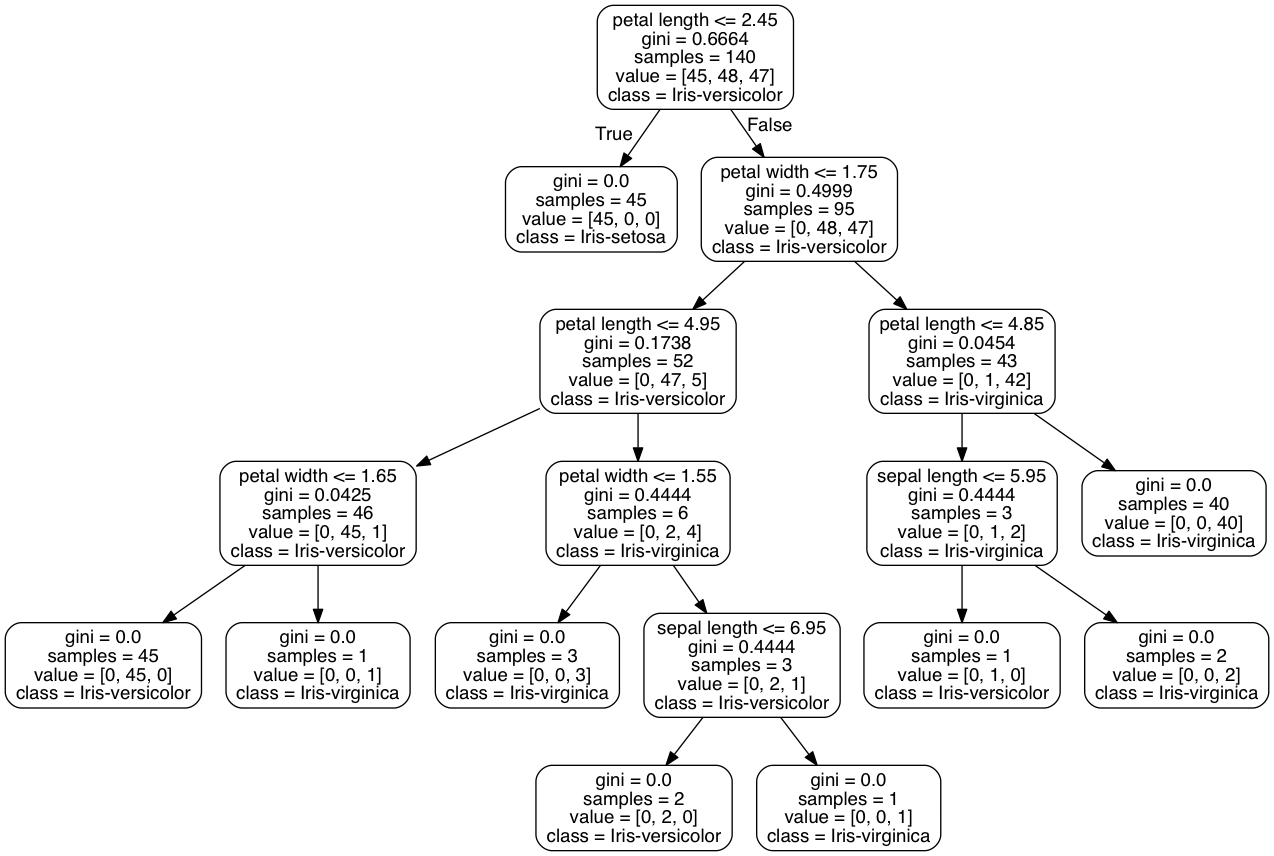

In [4]:
import pydotplus # brew install graphviz, pip install pydotplus
from io import StringIO
from IPython.display import Image, display  

dotfile = StringIO()
tree.export_graphviz(clf, out_file=dotfile, class_names=classes_names, feature_names=feats_names,
                         filled=False, rounded=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
display(Image(graph.create_png()))

In [5]:
predictions_test = clf.predict(test_features)
fails_test = np.sum(test_targets != predictions_test)
print("Objetivos: ", test_targets)
print("Resultados: ", list(predictions_test))
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test, len(test_targets), 100*fails_test/len(test_targets)))

Objetivos:  [0, 2, 2, 0, 0, 2, 1, 0, 0, 1]
Resultados:  [0, 2, 2, 0, 0, 2, 1, 0, 0, 1]
Puntos mal clasificados en el conjunto de prueba: 0 de 10 (0.0%)



<hr style="border-width: 2px;">

### Diabetes

Pruebas sobre el conjunto de datos *Pima Indian Diabetes Dataset* 

In [6]:
df = pd.read_csv("Data sets/Pima Indian Data Set/pima-indians-diabetes.data", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

df.loc[df['pad'] == 0,'pad'] = np.nan
df.loc[df['ept'] == 0,'ept'] = np.nan
df.loc[df['is2h'] == 0,'is2h'] = np.nan
df.loc[df['imc'] == 0,'imc'] = np.nan
df = df.dropna()

df_pure = df[list(['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad'])]
df_class = df[list(['class'])]

cut = df.shape[0] // 3 * 2
train_set = df_pure.head(cut).values
train_targets = df_class.head(cut).values.ravel()
test_set = df_pure.tail(df.shape[0]-cut).values
test_targets = df_class.tail(df.shape[0]-cut).values.ravel()

clfDiabetes = tree.DecisionTreeClassifier()
clfDiabetes = clfDiabetes.fit(train_set, train_targets)

predsDiabetes = clfDiabetes.predict(test_set)
failsDiabetes = np.sum(test_targets != predsDiabetes)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(failsDiabetes, len(test_set), 100*failsDiabetes/len(test_set)))

Puntos mal clasificados en el conjunto de prueba: 32 de 131 (24.427480916030536%)



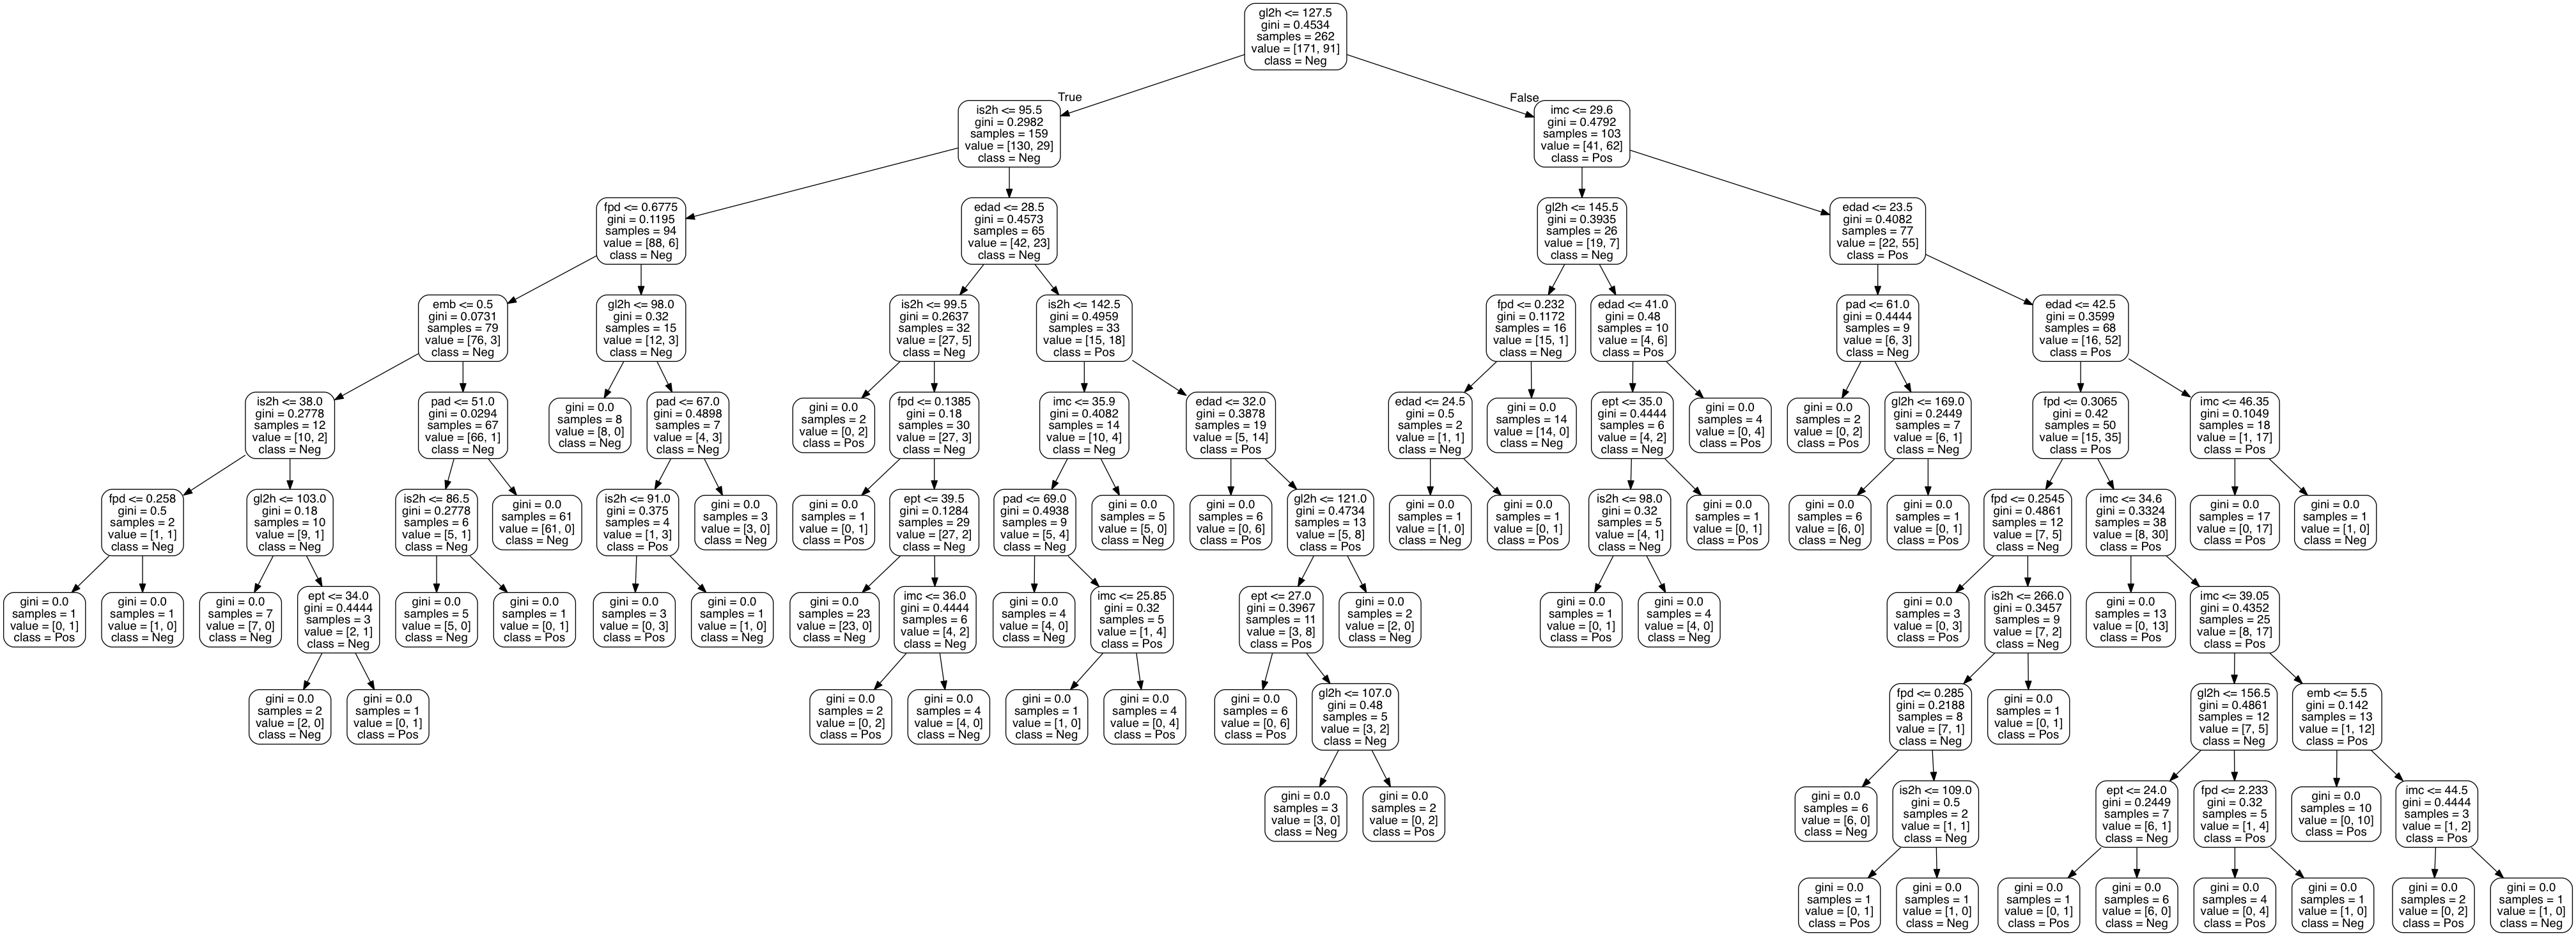

In [7]:
import pydotplus # brew install graphviz, pip install pydotplus
from io import StringIO
from IPython.display import Image, display  

dotfile = StringIO()
tree.export_graphviz(clfDiabetes, out_file=dotfile, class_names=["Neg", "Pos"], 
                     feature_names=['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad'],
                     filled=False, rounded=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
display(Image(graph.create_png()))

<hr style="border-width: 3px;">

### Tarea 10

* Complete la construcción manual del árbol de clasificación de superhéroes con el índice de Ginni.
* Haga una revisión de ventajas e inconvenientes de los árboles de decisión.

**Fecha de entrega**: Martes 18 de octubre.